   # 📍 Hotel Bookings Dataset 📍
***
   #### owner: Golovin Alexey

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')
        
logs.shape  # return amount of columns and rows

(4500, 4)

In [3]:
d1 = "logs has {} rows and {} columns"
d1 = d1.format(logs.shape[0], logs.shape[1])
print(d1)

logs has 4500 rows and 4 columns


In [5]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [6]:
user_data.shape

(2954, 3)

In [7]:
user_data.head(2)

,client,premium,age
0,46346,False,58
1,4391,False,55


In [8]:
logs.head(2)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658


### How many unique values consist **platform** variable?   

1st variant:

In [4]:
logs.groupby(['platform'], as_index = False) \
    .agg('client') \
    .count()

,platform,client
0,computer,1505
1,phone,2753
2,tablet,242


2nd variant:

In [5]:
platforms = logs['platform'].nunique()
print(platforms)

3


3rd variant:

In [11]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

### Which customer has made the most successful transactions?


In [13]:
logs.query('success == True') \
    .groupby(('client'), as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False) \
    .head(15)

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


### From which platform made a most successfull operations? 

In [19]:
logs.query('success == True') \
    .groupby(('platform'), as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False) \
    .head(15)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


### Which platform the most popular between premium customers? 

In [67]:
df_premium = logs.merge(user_data, on='client', how='inner') 

In [71]:
df_premium.query('success == True and premium == True') \
          .groupby('platform', as_index = False) \
          .agg({'success': 'count'}) \
          .sort_values('success', ascending = False) \
          .head(15)

,platform,success
1,phone,177
0,computer,108
2,tablet,18


### Visualize the distribution of client age depending on the client type (regular or premium) using the seaborn library with default color parameters.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

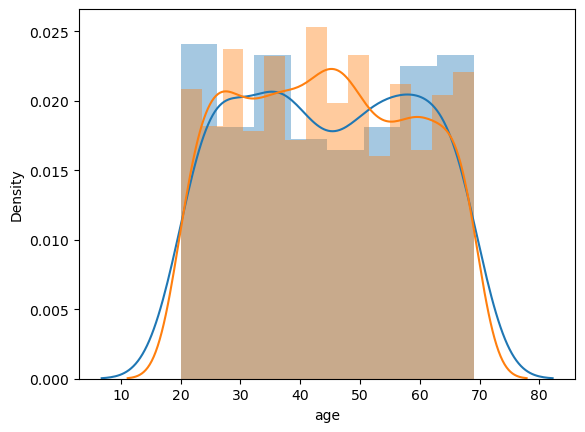

In [72]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
sns.distplot(user_data.query('premium == True').age, kde = True)
sns.distplot(user_data.query('premium == False').age, kde = True)

## Постройте график распределения числа успешных операций: 

    x – число успешных операций
    y – число клиентов, совершивших столько успешных операций

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

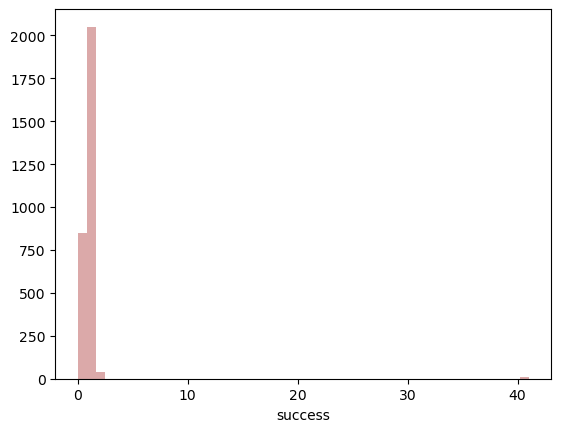

In [78]:
df1 = user_data.merge(logs, on='client')

client_vs_success = df1.groupby(['client'], as_index=False) \
    .agg({'success': 'sum'})

sns.distplot(client_vs_success.success, kde=False, color='brown')

## Visualize the number of successful operations made on the computer platform by age using sns.countplot.

 X-axis represents age and Y-axis represents the number of successful operations.   
 If the size of the plot is small, you can add plt.figure(figsize=(12, 8)) at the beginning of the corresponding cell.

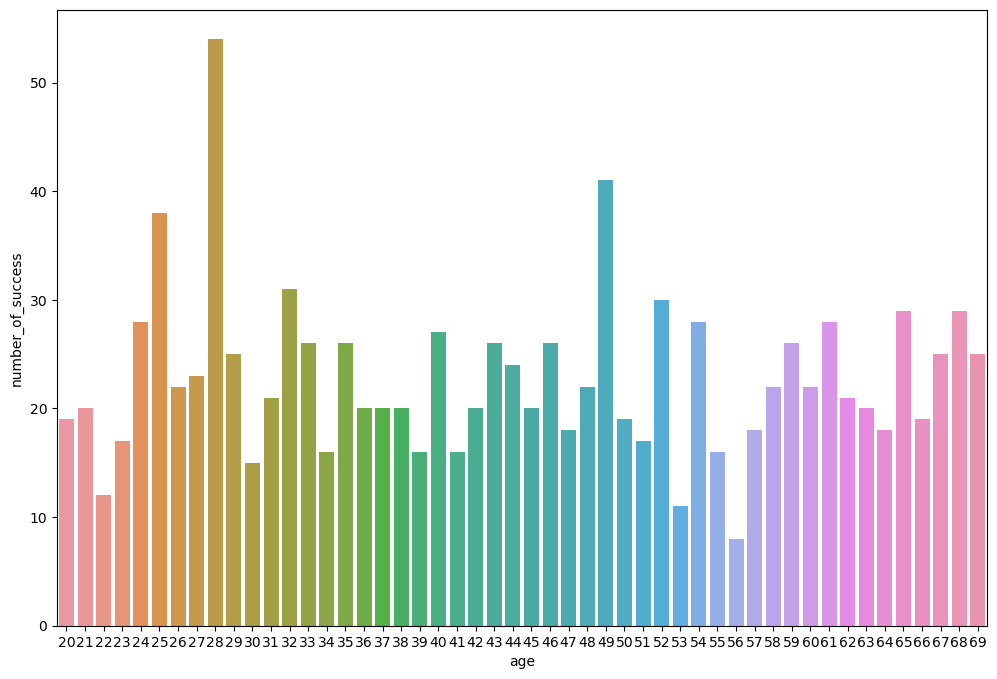

In [81]:
success_computer = df1.query('platform == "computer"')


plt.figure(figsize=(12, 8))  # increasing the figure size for better readability
ax = sns.countplot(x='age', data=success_computer)
ax.set(xlabel='age', ylabel='number_of_success')
sns.despine  # removing the top and right spines from plot
plt.show()